# Dynamics HW3
by Aspen Morgan

### Problem 1: Downloading and plotting ERA5 data

### (a) and (b): Download and plot the zonal-wind and temperature fields in three projections: a northern polar stereographic projection; a global projection; and a southern stererographic project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
!pip install cartopy
import cartopy.crs as ccrs

In [3]:
# read netCDF data into Dataset
era5 = xr.open_dataset("/content/drive/MyDrive/Colab Notebooks/Atmos_Dynamics/era5_aug2022.nc")

# z = geopotential height, t = temp, and u = zonal wind
era5

<xarray.Dataset> Size: 37MB
Dimensions:         (pressure_level: 3, latitude: 721, longitude: 1440)
Coordinates:
    number          int64 8B ...
    date            int64 8B ...
  * pressure_level  (pressure_level) float64 24B 150.0 100.0 70.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Data variables:
    z               (pressure_level, latitude, longitude) float32 12MB ...
    t               (pressure_level, latitude, longitude) float32 12MB ...
    u               (pressure_level, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-09-24T22:44 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
# create new variables for temperature in celcius and fahrenheit (easier for me to interpret)
era5['t2'] = era5.t - 273.15
era5['t2'] = era5.t2.assign_attrs(units='C', long_name='Temperature')
era5['t3'] = (9/5)*era5.t2 + 32
era5['t3'] = era5.t3.assign_attrs(units='F', long_name='Temperature')

In [ ]:
# isolate temp at 100hPa and view data structure
temp = era5.t3.sel(pressure_level=100)
temp

<xarray.DataArray 't3' (latitude: 721, longitude: 1440)> Size: 4MB
array([[ -48.243317,  -48.243317,  -48.243317, ...,  -48.243317,
         -48.243317,  -48.243317],
       [ -48.238045,  -48.238045,  -48.238045, ...,  -48.2398  ,
         -48.2398  ,  -48.2398  ],
       [ -48.238045,  -48.236282,  -48.236282, ...,  -48.238045,
         -48.238045,  -48.238045],
       ...,
       [-121.11168 , -121.11168 , -121.10991 , ..., -121.11168 ,
        -121.11168 , -121.11168 ],
       [-121.044876, -121.044876, -121.04312 , ..., -121.044876,
        -121.044876, -121.044876],
       [-120.97281 , -120.97281 , -120.97281 , ..., -120.97281 ,
        -120.97281 , -120.97281 ]], dtype=float32)
Coordinates:
    number          int64 8B ...
    date            int64 8B ...
    pressure_level  float64 8B 100.0
  * latitude        (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude       (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    expver          <U4 16B ...
Attributes:
    units:      F
    long_name:  Temperature

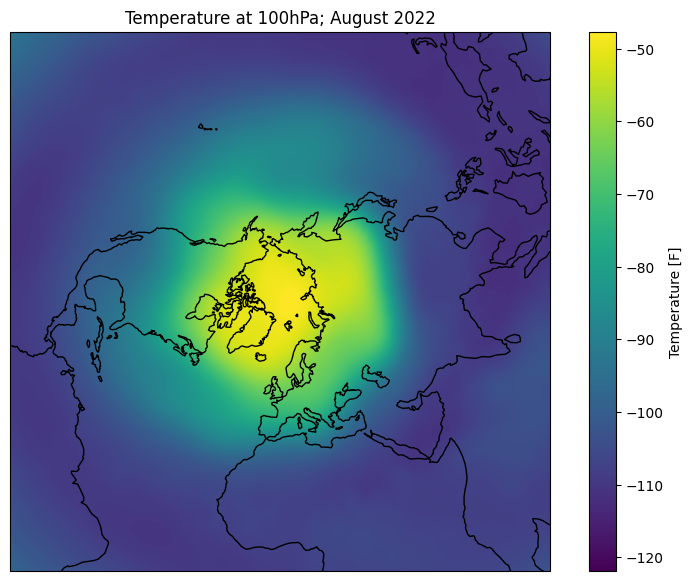

In [ ]:
# plot temp at 100hPa with Northern Polar Stereographic
fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
ax.set_extent([0, 360, 0, 90], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
temp.plot(ax=ax, transform=ccrs.PlateCarree()) # transform is the projection we're coming from, assuming Plate
ax.coastlines() # to view land boundaries
ax.set_title('Temperature at 100hPa; August 2022');

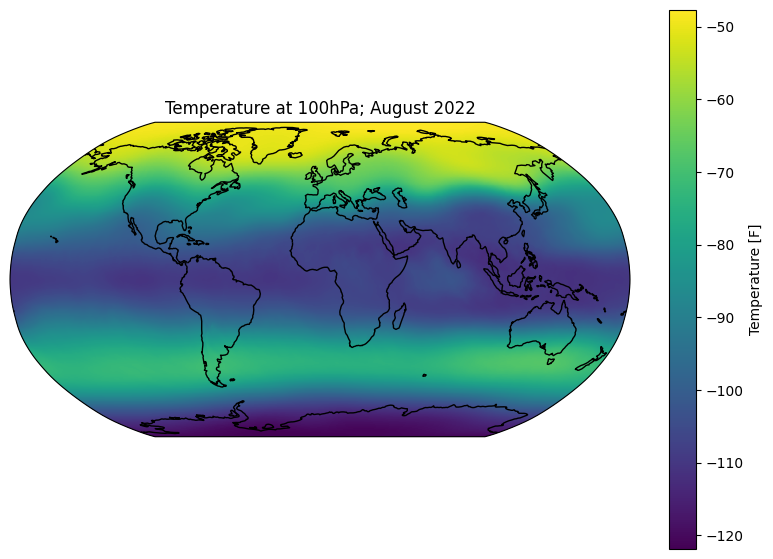

In [ ]:
# plot temp at 100hPa with Northern Polar Stereographic
fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw=dict(projection=ccrs.Robinson()))
temp.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines();
ax.set_title('Temperature at 100hPa; August 2022');

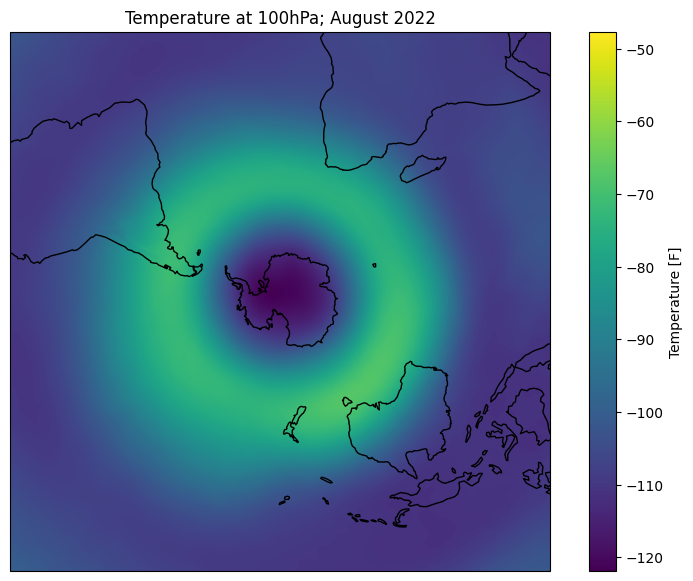

In [ ]:
# plot temp at 100hPa with Southern Polar Stereographic
fig, ax = plt.subplots(1, 1, figsize=(10, 7), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
temp.plot(ax=ax, transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax.coastlines();
ax.set_title('Temperature at 100hPa; August 2022');

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


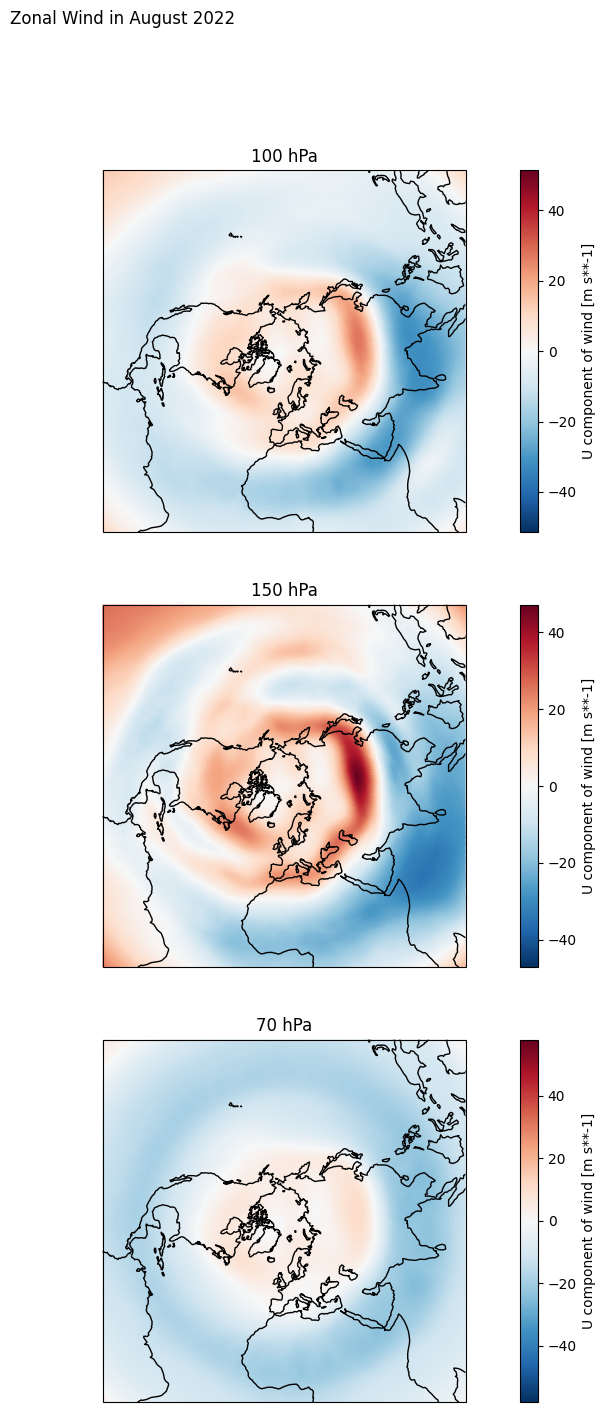

In [ ]:
# plot zonal wind at in North Polar Stereo
fig, ax = plt.subplots(3, 1, figsize=(14, 16), subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
u1 = era5.u.sel(pressure_level=100.0)
u2 = era5.u.sel(pressure_level=150.0)
u3 = era5.u.sel(pressure_level=70.0)
u1.plot(ax=ax[0], transform=ccrs.PlateCarree())
u2.plot(ax=ax[1], transform=ccrs.PlateCarree())
u3.plot(ax=ax[2], transform=ccrs.PlateCarree())
ax[0].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[0].coastlines()
ax[1].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[1].coastlines()
ax[2].set_extent([-180, 180, 0, 90], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[2].coastlines()
fig.suptitle('Zonal Wind in August 2022');
ax[0].set_title('100 hPa');
ax[1].set_title('150 hPa');
ax[2].set_title('70 hPa');

Text(0.5, 1.0, '70 hPa')

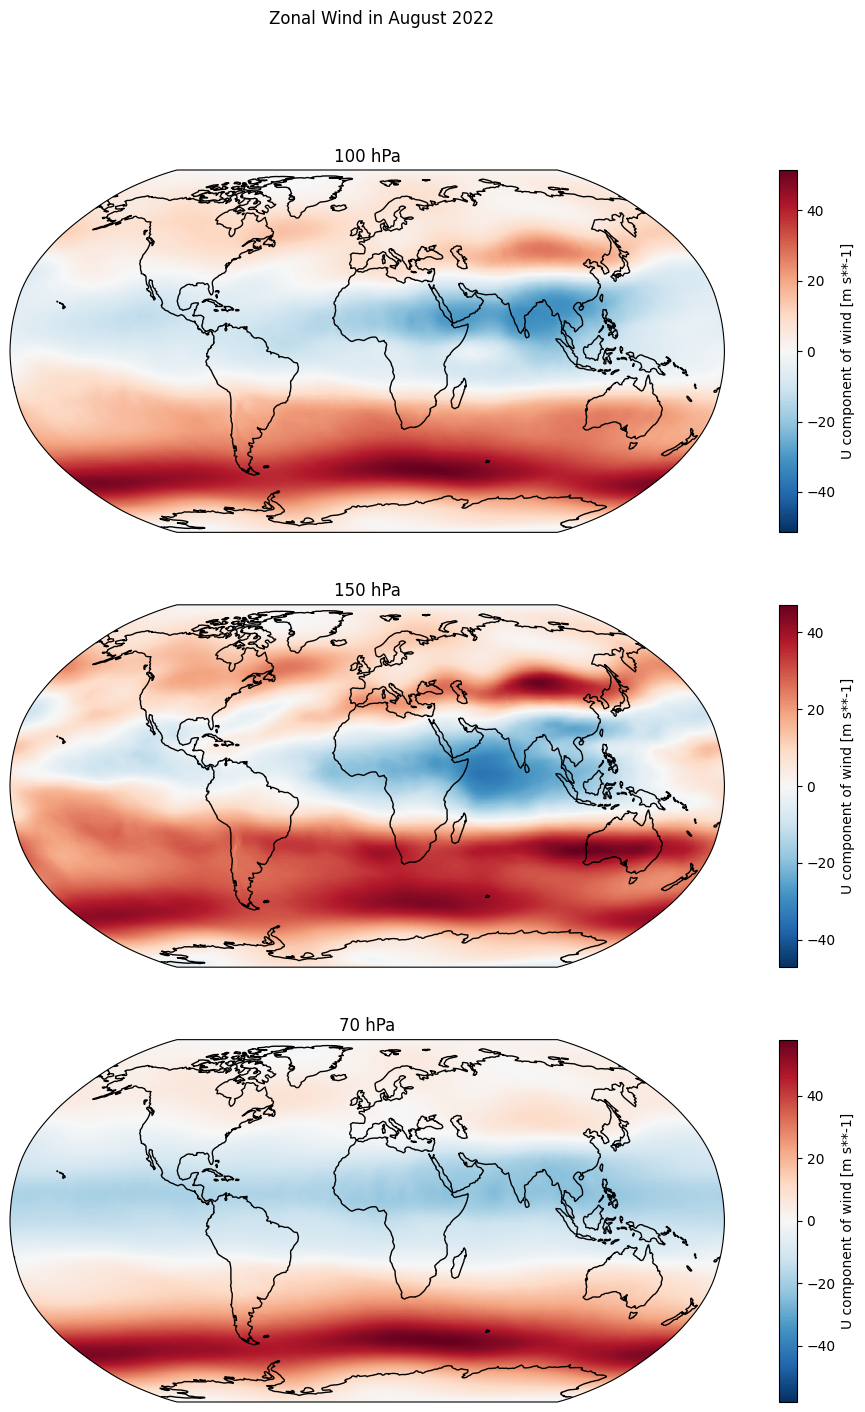

In [ ]:
# plot zonal wind in global
fig, ax = plt.subplots(3, 1, figsize=(14, 16), subplot_kw=dict(projection=ccrs.Robinson()))
u1 = era5.u.sel(pressure_level=100.0)
u2 = era5.u.sel(pressure_level=150.0)
u3 = era5.u.sel(pressure_level=70.0)
u1.plot(ax=ax[0], transform=ccrs.PlateCarree())
u2.plot(ax=ax[1], transform=ccrs.PlateCarree())
u3.plot(ax=ax[2], transform=ccrs.PlateCarree())
ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()
fig.suptitle('Zonal Wind in August 2022');
ax[0].set_title('100 hPa');
ax[1].set_title('150 hPa');
ax[2].set_title('70 hPa');

Text(0.5, 1.0, '70 hPa')

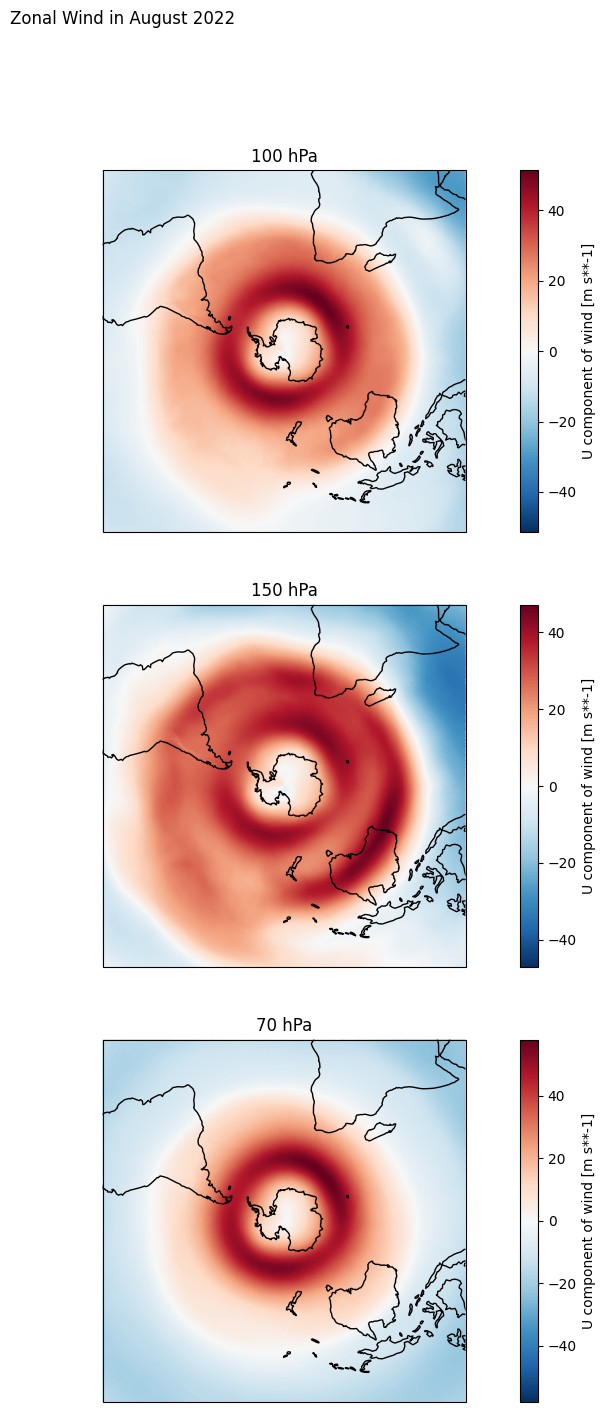

In [ ]:
# plot zonal wind in southern polar stereo
fig, ax = plt.subplots(3, 1, figsize=(14, 16), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
u1 = era5.u.sel(pressure_level=100.0)
u2 = era5.u.sel(pressure_level=150.0)
u3 = era5.u.sel(pressure_level=70.0)
u1.plot(ax=ax[0], transform=ccrs.PlateCarree())
u2.plot(ax=ax[1], transform=ccrs.PlateCarree())
u3.plot(ax=ax[2], transform=ccrs.PlateCarree())
ax[0].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[0].coastlines()
ax[1].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[1].coastlines()
ax[2].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree()) # [long_min, long_max, lat_min, lat_max]
ax[2].coastlines()
fig.suptitle('Zonal Wind in August 2022');
ax[0].set_title('100 hPa')
ax[1].set_title('150 hPa')
ax[2].set_title('70 hPa')

### Describe the most prominent features in the temperature and wind fields.

**Temperature:**
The temperature field at 100hPa in August 2022 contains zonal bands of consistent temperature. The South pole band is the coldest at -120F, which makes sense because August is winter in the Southern Hemisphere. The South extratropical band is warmer at around -65F, followed by the tropical band at around -110F. The North extratropical band is less distinct over Asia where the North pole temperature band dips down South and the tropical temperature band expands up North, but the North extratropical band is around -70F everywhere else. The North pole temperature band is comparatively warm and is around -50F.

**Zonal Wind:**
The ERA5 zonal wind speed assumes West to East as positive and East to West as negative. Since these plots are for 150hPa, 100hPa, and 70hPa, we are in the upper atmosphere around the top of the troposphere and bottom of the stratosphere. For all three pressure levels, we generally see calmer conditions at the poles, westerly wind in the extratropics and, easterlies in the tropics. As the pressure decreases, the wind speed also decreases. Although, the westerlies in the South extratropics remain quite strong even at 70hPa. There is a similar gradient in the zonal wind that somewhat matches up with the gradient in the temperature at 100hPa. Colder areas correspond to areas of easterly wind and warmer areas correspond to calm or westerly wind. The temperature front over Asia also corresponds to higher wind speeds that are easterly in the South and westerly in the North.

## (2) **Calculating the geostrophic flow**

Using geopotential at 100hPa, solve for the geostrophic component of the zonal-wind ($U_g$):

$U_g=-\frac{1}{f}*\frac{d\phi}{dy}$ where $\phi$ is the geopotential.

Solving for $U_g$:
* $f=2\Omega*sin(\theta)=2\Omega*sin(latitude)$.
* Since f is zero at the equator and we are using $\frac{1}{f}$ in our formula for $U_g$, I will use f at 0.25 degrees to keep from getting insanely large values.
* $\Omega$ is the diurnal rotation of the Earth in radians/s. By using radians (a psuedo-unit) we get the proper units:
$U_g=-\frac{1}{f}*\frac{d\phi}{dy}$ so $\frac{m}{s}=\frac{1}{f}*\frac{m^2}{s^2*m}$ and so $\frac{1}{f}$ needs to be in seconds.
* To get $\frac{d\phi}{dy}$, we need to approximate the derivative of the geopotential with respect to meridional distance. We have $\phi$(latitude, longitude), so we can use the np.gradient function and input a custom change in y. The latitude values are separated by a quarter degree, which converts to an arc length distance of $R_e*0.25*\frac{\pi}{180}$ since $S=r\theta$ where $R_e$ is the radius of the Earth. I multiplied by -1 because the signs were opposite expected.



### (a) In a single column with three panels, plot on a southern polar projection:
* (top) the geostrophic component of the zonal-wind (Ug) as color shaded map.
* (middle) the actual zonal-wind (U)
* (bottom) the ageostrophic wind (Ua=U-Ug).

Plot all three panels using the same color axis so that you can assess the relative amplitudes of the
results.

In [4]:
# actual zonal wind DataArray
actual = era5.u.sel(pressure_level=100)

# geopotential DataArray
geopot = era5.z.sel(pressure_level=100)

# constants
omega = 7.3*(10**-5) # angular velocity in rad/s
Re = 6.4*(10**6) # radius of Earth in meters
dy = 0.25*Re*np.pi/180 # convert latitude to meridional arc length

In [5]:
# get f for every latitude, but match shape to other data
latitudes = len(actual.latitude)
longitudes = len(actual.longitude)
f = np.ones((latitudes, longitudes)) # initialize empty array
for i in range(latitudes):
    f_buf = 2*omega*np.sin(np.radians(actual.latitude[i]))

    # get rid of zeros to avoid infinity in ug
    if f_buf == 0:
      f_buf = 2*omega*np.sin(np.radians(0.25)) # set to value at 0.25 degree

    f[i, :] = f_buf

In [6]:
# get dphi_dy
dphi_dy = -np.gradient(geopot, dy, axis=0) # multiply by -1 because of how

# calculate geostrophic component of wind
ug = -(1/f)*dphi_dy

# NaN arrays for 150 and 70 pressure levels
filler = np.NaN*np.ones(ug.shape)
ug_buf = [filler, ug, filler]

# add geostrophic to xarray dataset
era5['ug'] = xr.DataArray(ug_buf, dims=['pressure_level', 'latitude', 'longitude'], coords=[[150, 100, 70], actual.latitude, actual.longitude])
era5['ug'] = era5.ug.assign_attrs(units='m s**-1', long_name='Ug component of wind')

# add ageostrophic to xarray dataset
era5['ua'] = era5.u - era5.ug
era5['ua'] = era5.ua.assign_attrs(units='m s**-1', long_name='Ua component of wind')

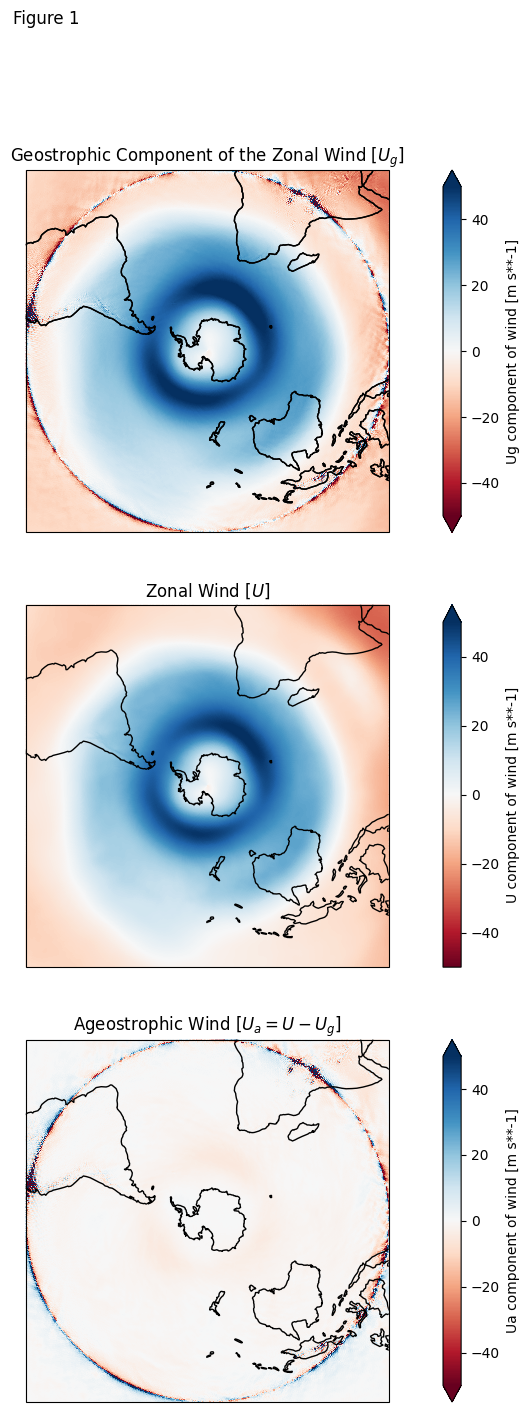

In [ ]:
# plot
fig, ax = plt.subplots(3, 1, figsize=(14, 16), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
era5.ug.sel(pressure_level=100).plot(ax=ax[0], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
era5.u.sel(pressure_level=100).plot(ax=ax[1], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
era5.a.sel(pressure_level=100).plot(ax=ax[2], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
ax[0].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[0].coastlines()
ax[0].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[0].coastlines()
ax[1].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[1].coastlines()
ax[2].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[2].coastlines()
fig.suptitle('Figure 1');
ax[0].set_title('Geostrophic Component of the Zonal Wind [$U_g$]');
ax[1].set_title('Zonal Wind [$U$]');
ax[2].set_title('Ageostrophic Wind [$U_a=U-U_g$]');

### (b) Plot the zonal-mean components of the results from b). That is: compute the zonal average of the above plots and then plot the results as a function of latitude (x-axis) and m/s (yaxis).

In this case, show all three sets of results on the same panel, but use different colors for $U$, $U_g$,
and $U_a$.

In [7]:
# empty arrays to save values
mean_actual = np.ones((721, 1440))
mean_geostrophic = np.ones((721, 1440))
mean_ageo = np.ones((721, 1440))

# loop to get mean latitude with proper shape
for lat in range(latitudes):
  mean_actual[lat, :] = era5.u.sel(pressure_level=100)[lat].mean()
  mean_geostrophic[lat, :] = era5.ug.sel(pressure_level=100)[lat].mean()
  mean_ageo[lat, :] = era5.ua.sel(pressure_level=100)[lat].mean()

# adding filler to put in DataSet
mean_actual_buf = [filler, mean_actual, filler]
mean_geostrophic_buf = [filler, mean_geostrophic, filler]
mean_ageo_buf = [filler, mean_ageo, filler]

# put in DataSet
era5['u_m'] = xr.DataArray(mean_actual_buf, dims=['pressure_level', 'latitude', 'longitude'], coords=[[150, 100, 70], actual.latitude, actual.longitude])
era5['u_m'] = era5.u_m.assign_attrs(units='m s**-1', long_name='Mean U component of wind')
era5['ug_m'] = xr.DataArray(mean_geostrophic_buf, dims=['pressure_level', 'latitude', 'longitude'], coords=[[150, 100, 70], actual.latitude, actual.longitude])
era5['ug_m'] = era5.ug_m.assign_attrs(units='m s**-1', long_name='Mean Ug component of wind')
era5['ua_m'] = xr.DataArray(mean_ageo_buf, dims=['pressure_level', 'latitude', 'longitude'], coords=[[150, 100, 70], actual.latitude, actual.longitude])
era5['ua_m'] = era5.ua_m.assign_attrs(units='m s**-1', long_name='Mean Ua component of wind')

Text(0.5, 1.0, 'Mean $U_a$')

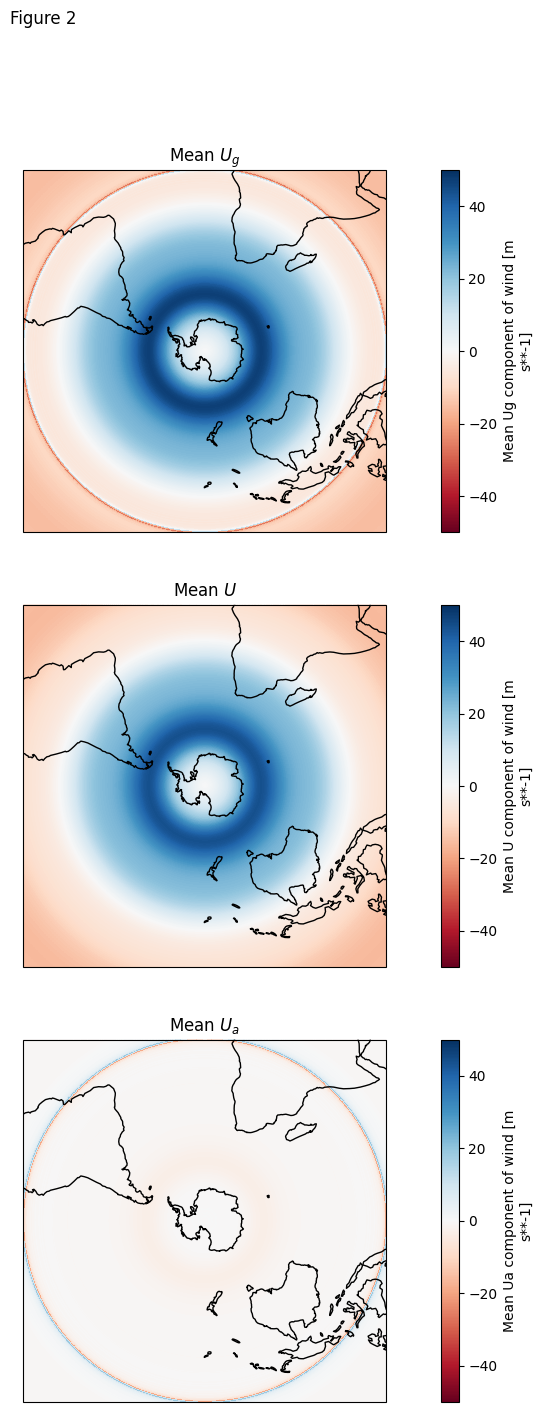

In [ ]:
# plot
fig, ax = plt.subplots(3, 1, figsize=(14, 16), subplot_kw=dict(projection=ccrs.SouthPolarStereo()))
era5.ug_m.sel(pressure_level=100).plot(ax=ax[0], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
era5.u_m.sel(pressure_level=100).plot(ax=ax[1], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
era5.ua_m.sel(pressure_level=100).plot(ax=ax[2], transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu')
ax[0].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[0].coastlines()
ax[1].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree())
ax[1].coastlines()
ax[2].set_extent([-180, 180, -90, 0], crs=ccrs.PlateCarree() )
ax[2].coastlines()
fig.suptitle('Figure 2');
ax[0].set_title('Mean $U_g$')
ax[1].set_title('Mean $U$')
ax[2].set_title('Mean $U_a$')

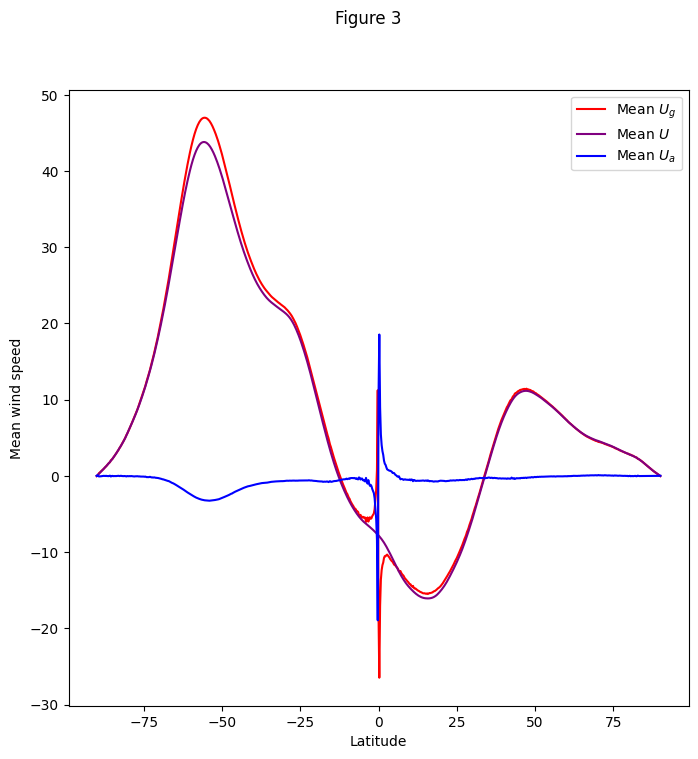

In [8]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.plot(era5.latitude, era5.ug.mean(dim='longitude').sel(pressure_level=100), c='red', label='Mean $U_g$')
ax.plot(era5.latitude, era5.u.mean(dim='longitude').sel(pressure_level=100), c='purple', label='Mean $U$')
ax.plot(era5.latitude, era5.ua.mean(dim='longitude').sel(pressure_level=100), c='blue', label='Mean $U_a$')
ax.legend()
ax.set_xlabel('Latitude')
ax.set_ylabel('Mean wind speed')
fig.suptitle('Figure 3');

### (c) Discuss key aspects of your results in ~1-2 paragraphs.

Based on Figure 3, it appears that the majority of the monthly averaged wind in August 2022 was from geostrophic balance. This is especially true in the Northen Hemisphere. In the Southern Hemisphere, there is some Ageostrophic wind between -45 degrees and -65 degrees, which is just visible in Figures 1 and 2. This makes sense because there is a sharp gradient between the total zonal wind speed and the geostrophic wind speed in that same latitude range and geostrophic wind ignores accleration.

Since geostrophic balance is normally achieved after a few weeks, it also makes sense that most of the wind is geostrophic. I expect that we would have more ageostrophic wind if we looked at a shorter time scale.



